<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [70]:
!wget 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip'

--2020-11-02 08:39:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  19.9MB/s    in 14s     

2020-11-02 08:39:40 (18.3 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [71]:
!unzip -q -o 'concrete_data_week4.zip'

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,AveragePooling2D,Flatten,Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input


In [12]:
batch_size=100
num_classes=2


In [13]:
datagenerator=ImageDataGenerator(preprocessing_function=preprocess_input)
image_size= 224

train_generator=datagenerator.flow_from_directory('concrete_data_week4/train',target_size=(image_size,image_size),batch_size=batch_size)
valid_generator=datagenerator.flow_from_directory('concrete_data_week4/valid',target_size=(image_size,image_size),batch_size=batch_size)

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.


In [77]:
model=Sequential()
model.add(VGG16(weights='imagenet',include_top=False,pooling='avg'))
model.layers[0].trainable = False
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 14,846,530
Trainable params: 131,842
Non-trainable params: 14,714,688
_________________________________________________________________


In [78]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
history=model.fit_generator(train_generator,epochs=3,validation_data=valid_generator)



Epoch 1/3
301/301 [==============================] - 101s 337ms/step - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0065 - val_accuracy: 0.9980
Epoch 2/3
301/301 [==============================] - 100s 333ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0071 - val_accuracy: 0.9978
Epoch 3/3
301/301 [==============================] - 100s 334ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9983


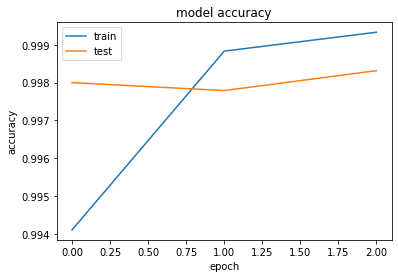

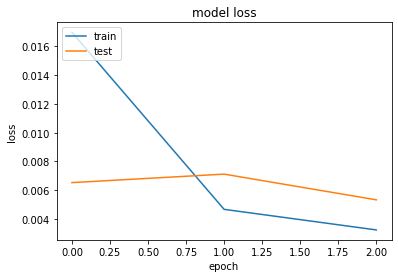

In [80]:
# Plot model accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.save('Classifier_vgg16_model.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [61]:
!pip install torchvision

In [62]:
from keras.models import load_model
vgg16_model=load_model('Classifier_vgg16_model.h5')

import torch
resnet80_model = torch.load('/content/Classifier_resnet80_model.pt')

In [105]:
image_size= 224
batch_size=100
test_generator=datagenerator.flow_from_directory('concrete_data_week4/test',target_size=(image_size,image_size),batch_size=batch_size)


Found 500 images belonging to 2 classes.


In [106]:
print("VGG model performance")
vgg=model.evaluate_generator(test_generator)
print(vgg)
print("The accuracy is = %0.3f"%(100.0*vgg[1]))
print("The loss is ",str(vgg[0]))

VGG model performance
[0.0026277315337210894, 1.0]
The accuracy is = 100.000
The loss is  0.0026277315337210894


In [76]:
# Model was created using Pytroch (another lab assignment)
from torchvision import datasets
from torchvision import datasets, transforms, models
data_transforms = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(dataset=datasets.ImageFolder('concrete_data_week4/test',transform=data_transforms), batch_size=100)


correct=0
count=0
for i, (x_test, y_test) in enumerate(test_loader):
    # set model to eval
    resnet80_model.eval()
    
    # make a prediction
    z = resnet80_model(x_test)
    
    # find max
    _, yhat = torch.max(z.data, 1)
    
    # print mis-classified samples
    count+= z.shape[0]
    
    correct += (yhat==y_test).sum().item()

print("Performance of Resnet Model = %0.3f"%(100.0*correct/count))

Performance of Resnet Model = 96.400


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [93]:
# Generate predictions for VGG
vgg_predictions=model.predict_generator(test_generator)


In [94]:
def get_prediction(x):
  for i in x:
    j=np.argmax(i)
    if(j==0):
      print("Negative")
    else:
      print("Positive")

In [95]:
# Report actual predictions
get_prediction(test_generator.next()[1][0:5])

Negative
Positive
Negative
Negative
Negative


In [96]:
# VGG 16 predictions
get_prediction(vgg_predictions[0:5])

Negative
Negative
Positive
Positive
Negative


In [101]:
# Resnet 80 predictions
# Model was created using Pytroch (another lab assignment)
from torchvision import datasets
from torchvision import datasets, transforms, models
data_transforms = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(dataset=datasets.ImageFolder('concrete_data_week4/test',transform=data_transforms), batch_size=1)


correct=0
count=0
for i, (x_test, y_test) in enumerate(test_loader):
    # set model to eval
    resnet80_model.eval()
    
    # make a prediction
    z = resnet80_model(x_test)
   
    # find max
    _, yhat = torch.max(z.data, 1)
    
    j=np.argmax(yhat)
    if(j==0):
      print("Negative")
    else:
      print("Positive")
    
    if i>=4:
      break

Negative
Negative
Negative
Negative
Negative


### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).